# LOAN APPROVAL PREDICTION

--------------------------------------------------------------------------------------------

--------------------------------------------------------------

In [3]:
# IMPORT LIBRARIES

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [113]:
#import dataset
df = pd.read_csv(r'C:\Users\ACER\Downloads\loan_approval_dataset.csv')

In [114]:
df.head(5)

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

#### BASIC DESCRIPTIVE STATISTICS

In [115]:
df.shape

(4269, 13)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [117]:
df.describe()

loan_id   no_of_dependents   income_annum   loan_amount  \
count  4269.000000        4269.000000   4.269000e+03  4.269000e+03   
mean   2135.000000           2.498712   5.059124e+06  1.513345e+07   
std    1232.498479           1.695910   2.806840e+06  9.043363e+06   
min       1.000000           0.000000   2.000000e+05  3.000000e+05   
25%    1068.000000           1.000000   2.700000e+06  7.700000e+06   
50%    2135.000000           3.000000   5.100000e+06  1.450000e+07   
75%    3202.000000           4.000000   7.500000e+06  2.150000e+07   
max    4269.000000           5.000000   9.900000e+06  3.950000e+07   

         loan_term   cibil_score   residential_assets_value  \
count  4269.000000   4269.000000               4.269000e+03   
mean     10.900445    599.936051               7.472617e+06   
std       5.709187    172.430401               6.503637e+06   
min       2.000000    300.000000              -1.000000e+05   
25%       6.000000    453.000000               2.200000e+06   
50%      10.000000    600.000000               5.600000e+06   
75%      16.000000    748.000000               1.130000e+07   
max      20.000000    900.000000               2.910000e+07   

        commercial_assets_value   luxury_assets_value   bank_asset_value  
count              4.269000e+03          4.269000e+03       4.269000e+03  
mean               4.973155e+06          1.512631e+07       4.976692e+06  
std                4.388966e+06          9.103754e+06       3.250185e+06  
min                0.000000e+00          3.000000e+05       0.000000e+00  
25%                1.300000e+06          7.500000e+06       2.300000e+06  
50%                3.700000e+06          1.460000e+07       4.600000e+06  
75%                7.600000e+06          2.170000e+07       7.100000e+06  
max                1.940000e+07          3.920000e+07       1.470000e+07

In [118]:
print(df.to_string())

      loan_id   no_of_dependents      education  self_employed   income_annum   loan_amount   loan_term   cibil_score   residential_assets_value   commercial_assets_value   luxury_assets_value   bank_asset_value  loan_status
0           1                  2       Graduate             No        9600000      29900000          12           778                    2400000                  17600000              22700000            8000000     Approved
1           2                  0   Not Graduate            Yes        4100000      12200000           8           417                    2700000                   2200000               8800000            3300000     Rejected
2           3                  3       Graduate             No        9100000      29700000          20           506                    7100000                   4500000              33300000           12800000     Rejected
3           4                  3       Graduate             No        8200000      30700000         

In [119]:
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [120]:
# checking missing values
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [121]:
# Check how many duplicate rows exist
df.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
4264    False
4265    False
4266    False
4267    False
4268    False
Length: 4269, dtype: bool

--------------------------------------------------

#### EXPLORATORY DATA ANALYSIS

-------------------------------------------------------

In [29]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [28]:
# Find numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Find categorical columns
categorical_columns = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

print("Numeric Columns:")
print(numeric_columns)

print("\nCategorical Columns:")
print(categorical_columns)



Numeric Columns:
['loan_id', ' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value']

Categorical Columns:
[' education', ' self_employed', ' loan_status']


In [32]:
print(df.columns.tolist())

['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


In [33]:
df.columns = df.columns.str.strip()

In [34]:
df['loan_status'] = df['loan_status'].astype(str).str.strip().str.lower()


In [39]:
df['loan_status'].value_counts(normalize=True) 


loan_status
approved    0.62216
rejected    0.37784
Name: proportion, dtype: float64

In [134]:
df.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [135]:
num_cols = df.select_dtypes(include='number').columns.tolist()
num_cols


[' no_of_dependents',
 ' income_annum',
 ' loan_amount',
 ' loan_term',
 ' cibil_score',
 ' residential_assets_value',
 ' commercial_assets_value',
 ' luxury_assets_value',
 ' bank_asset_value']

In [136]:
outlier_summary = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)][col].count()
    outlier_summary[col] = outliers

outlier_summary


{' no_of_dependents': np.int64(0),
 ' income_annum': np.int64(0),
 ' loan_amount': np.int64(0),
 ' loan_term': np.int64(0),
 ' cibil_score': np.int64(0),
 ' residential_assets_value': np.int64(52),
 ' commercial_assets_value': np.int64(37),
 ' luxury_assets_value': np.int64(0),
 ' bank_asset_value': np.int64(5)}

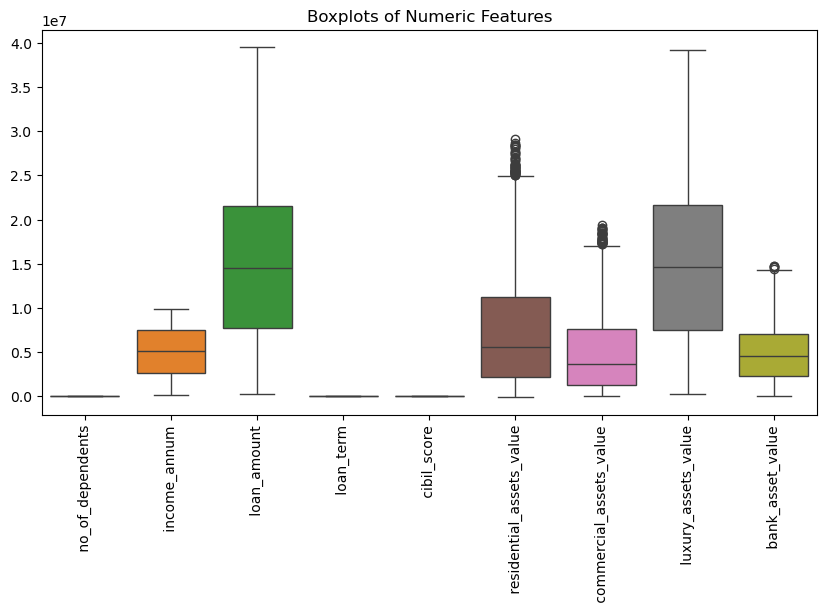

In [137]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=90)
plt.title("Boxplots of Numeric Features")
plt.show()

In [143]:
# Assuming 'df' is your original DataFrame
df.columns = df.columns.str.strip() 

cols_to_clean = [
    'residential_assets_value',  
    'commercial_assets_value',   
    'bank_asset_value'          
]

df_clean = df.copy()

for col in cols_to_clean:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

print(df_clean.shape)

(4173, 12)


In [144]:
# It replaces all zero values in the column income_annum with 1.Because log transformation cannot handle 0
df['income_annum'] = df['income_annum'].replace(0, 1)

In [145]:
df['income_annum_log'] = np.log1p(df['income_annum'])

In [147]:
Q1 = df['income_annum_log'].quantile(0.25)
Q3 = df['income_annum_log'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

new_outliers = ((df['income_annum_log'] < lower) | (df['income_annum_log'] > upper)).sum()
print(new_outliers)
    


174


In [148]:
Q1 = df['income_annum_log'].quantile(0.25)
Q3 = df['income_annum_log'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df['income_annum_log'] = df['income_annum_log'].clip(lower, upper)

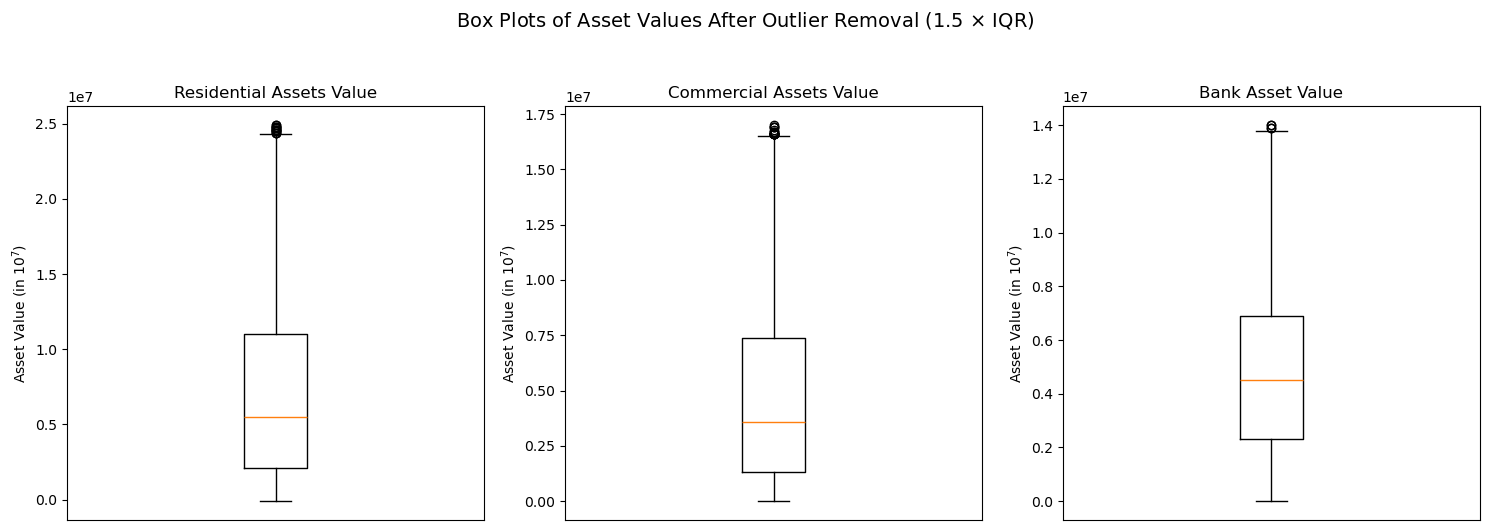

In [149]:
plt.figure(figsize=(15, 5))
plt.suptitle('Box Plots of Asset Values After Outlier Removal (1.5 $\\times$ IQR)', fontsize=14, y=1.05)

for i, col in enumerate(cols_to_clean):
    plt.subplot(1, 3, i + 1)
    
    # Generate the box plot
    plt.boxplot(df_clean[col].dropna())
    
    # Customize plot appearance
    plt.title(col.replace('_', ' ').title(), fontsize=12)
    plt.ylabel('Asset Value (in $10^7$)', fontsize=10)
    plt.xticks([]) # Remove x-ticks

plt.tight_layout()
plt.savefig('cleaned_assets_boxplots.png')

In [156]:


# Remove leading/trailing spaces and make consistent capitalization
df['education'] = df['education'].str.strip().str.title()
df['self_employed'] = df['self_employed'].str.strip().str.title()
df['loan_status'] = df['loan_status'].str.strip().str.title()
df.to_csv(r"", index=False)

print("Cleaned dataset saved as loan_cleaned.xlsx")


Cleaned dataset saved as loan_cleaned.xlsx


In [157]:
df.head(5)

no_of_dependents     education self_employed  income_annum  loan_amount  \
0                 2      Graduate            No       9600000     29900000   
1                 0  Not Graduate           Yes       4100000     12200000   
2                 3      Graduate            No       9100000     29700000   
3                 3      Graduate            No       8200000     30700000   
4                 5  Not Graduate           Yes       9800000     24200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   
3          8          467                  18200000                  3300000   
4         20          382                  12400000                  8200000   

   luxury_assets_value  bank_asset_value loan_status  income_annum_log  
0             22700000           8000000    Approved         16.077274  
1              8800000           3300000    Rejected         15.226498  
2             33300000          12800000    Rejected         16.023785  
3             23300000           7900000    Rejected         15.919645  
4             29400000           5000000    Rejected         16.097893

<Axes: xlabel='income_annum', ylabel='loan_amount'>

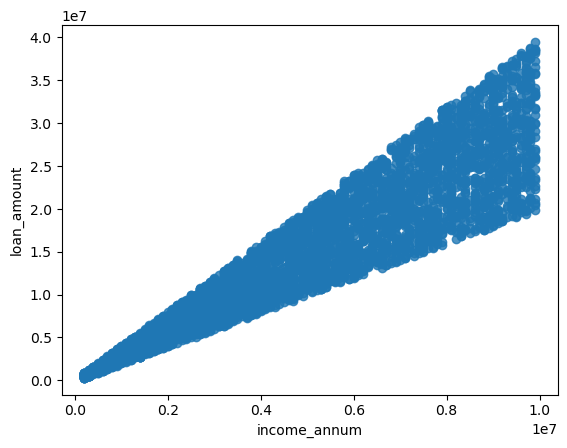

In [56]:
sns.regplot(x='income_annum', y='loan_amount', data=df)


Strong Positive Relationship: As the annual income increases, the loan amount almost perfectly increases.

In [54]:
pd.crosstab(df['education'], df['loan_status'])


loan_status   approved  rejected
education                       
Graduate          1339       805
Not Graduate      1317       808

There is no practical difference in the approval/rejection behavior between the Graduate and Not Graduate groups. 

In [55]:
df.groupby('loan_status')[numeric_cols].mean()


loan_id  no_of_dependents  income_annum   loan_amount  \
loan_status                                                              
approved     2151.984187          2.474774  5.025904e+06  1.524725e+07   
rejected     2107.033478          2.538128  5.113825e+06  1.494606e+07   

             loan_term  cibil_score  residential_assets_value  \
loan_status                                                     
approved     10.397590   703.461973              7.399812e+06   
rejected     11.728456   429.468072              7.592498e+06   

             commercial_assets_value  luxury_assets_value  bank_asset_value  
loan_status                                                                  
approved                5.001355e+06         1.501660e+07      4.959526e+06  
rejected                4.926720e+06         1.530694e+07      5.004960e+06

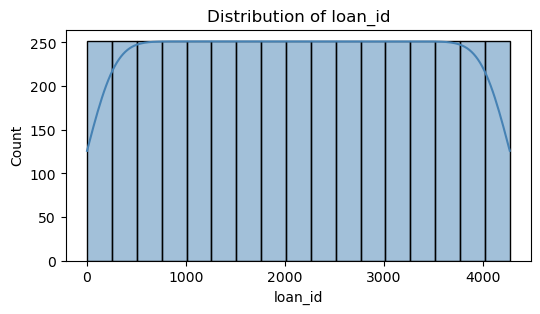

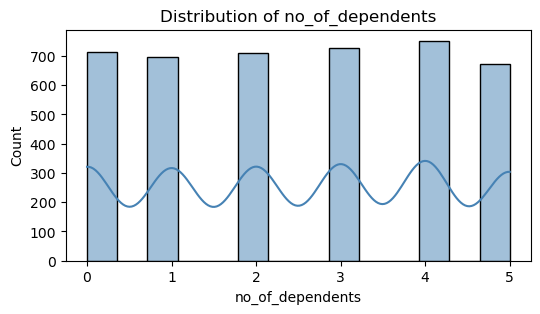

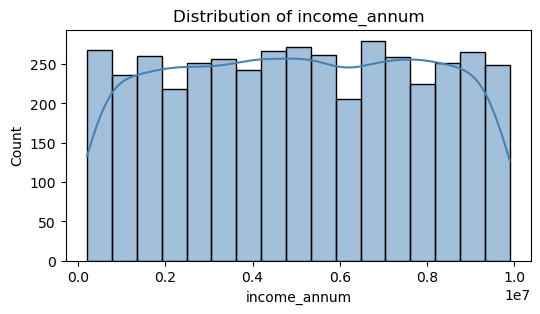

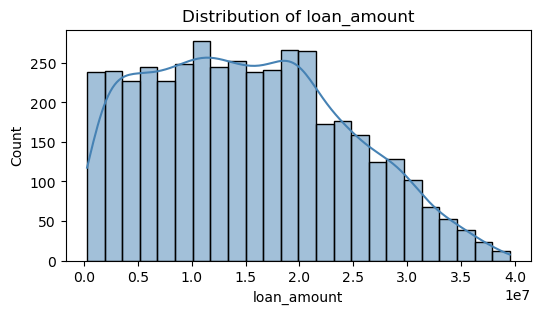

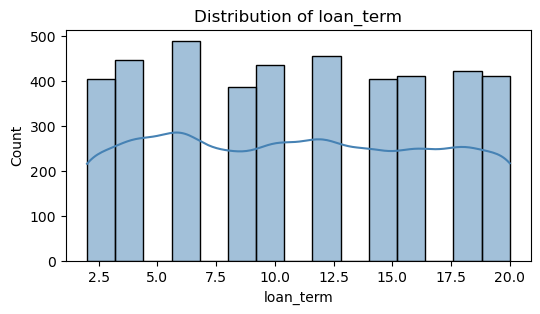

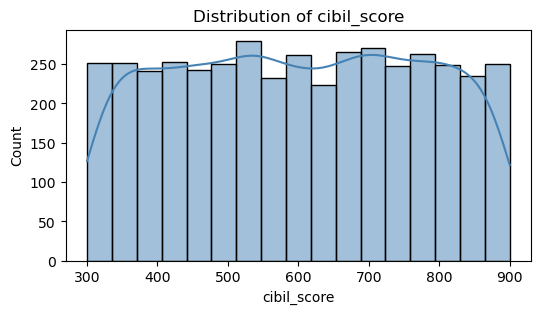

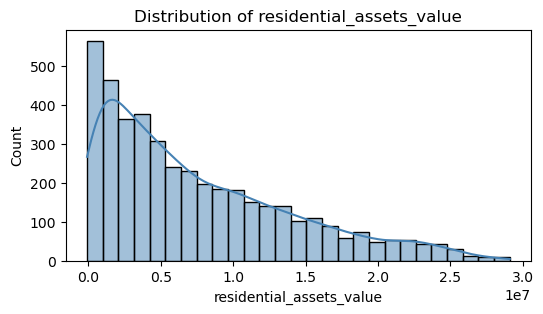

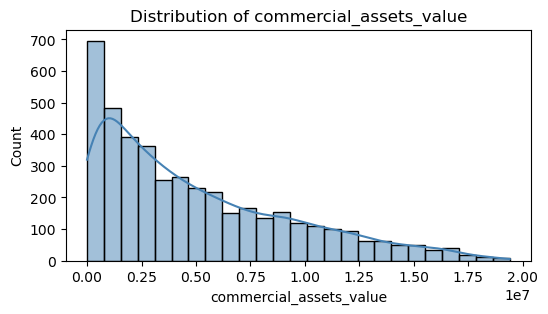

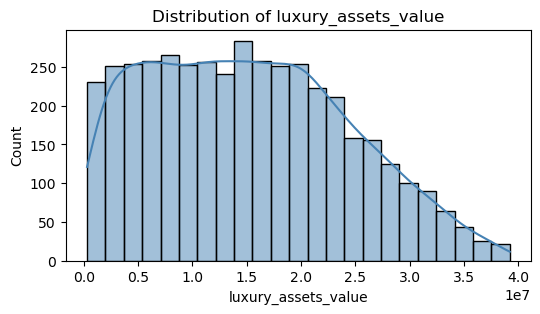

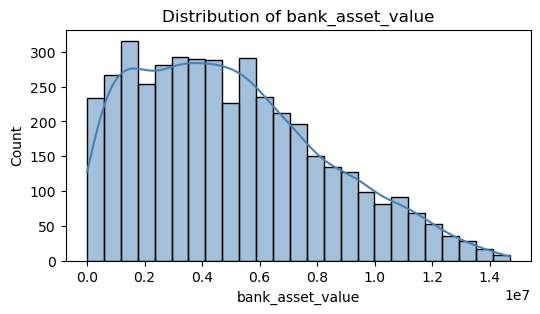

In [52]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True, color='steelblue')
    plt.title(f"Distribution of {col}")
    plt.show()



• Indicates majority applicants have small families.

• Most people earn low to medium income.

• Most loans are small to medium only few large loan requests.

• short-term and long-term loans.

• Cibil score close to normal distribution.

• Majority values are low–medium and only few wealthy applicants.

• Several high-value business owners.

• Very few people have luxury assets.

• Most applicants have low to medium bank assets


------------------------------------------------------------------------

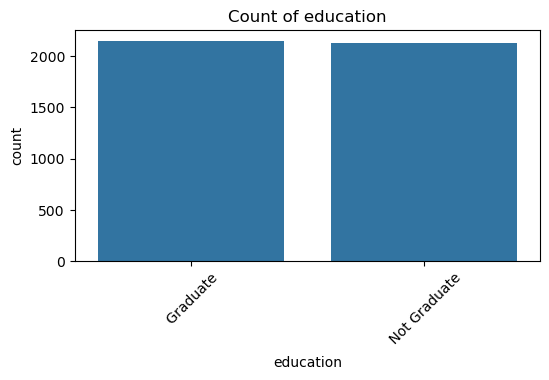

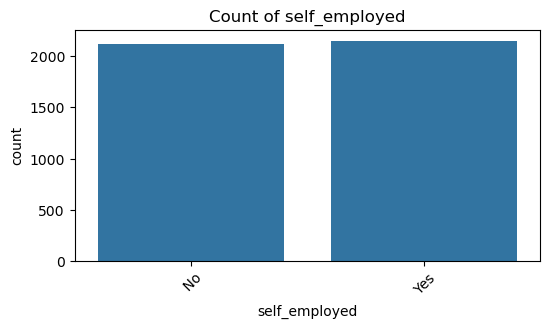

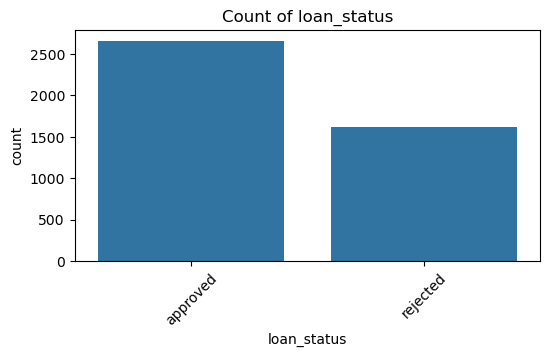

In [46]:
categorical_cols = df.select_dtypes(exclude=['float64','int64']).columns

for col in categorical_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=df[col])
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()


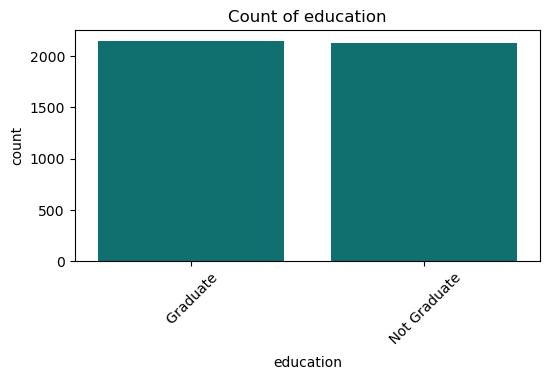

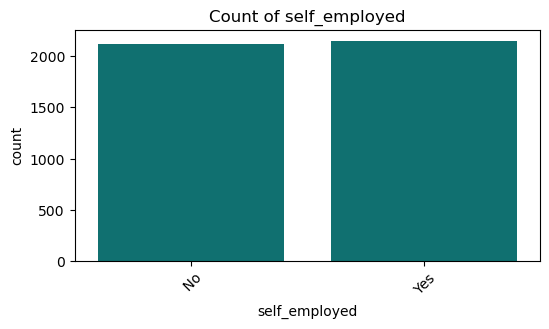

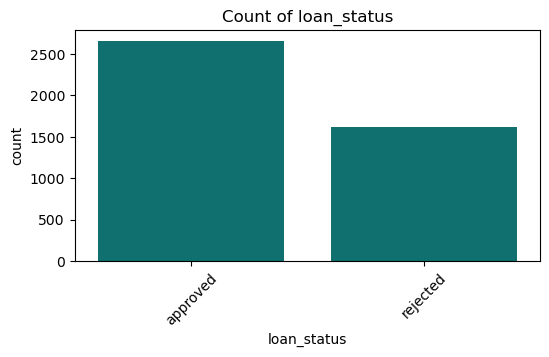

In [53]:
categorical_cols = df.select_dtypes(exclude=['int64','float64']).columns

for col in categorical_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=df[col], color='teal')
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()


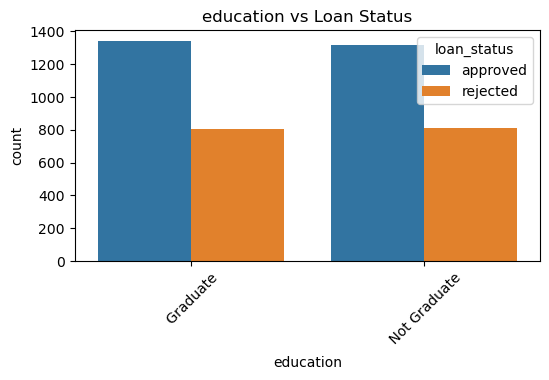

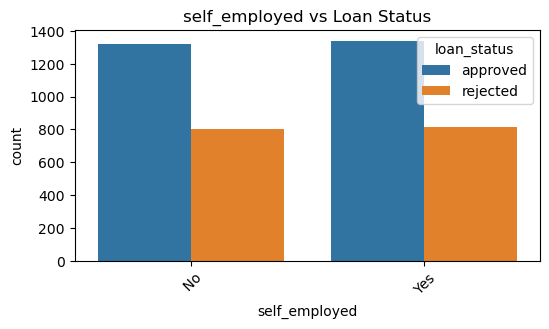

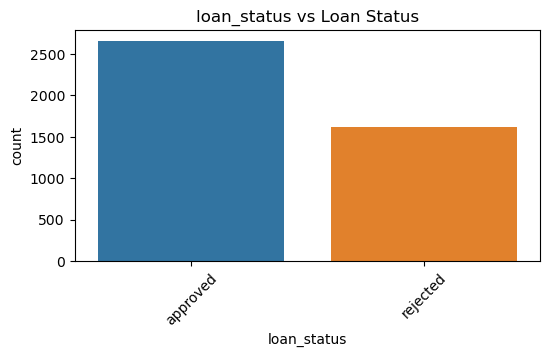

In [48]:
for col in categorical_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=df[col], hue=df['loan_status'])
    plt.title(f"{col} vs Loan Status")
    plt.xticks(rotation=45)
    plt.show()


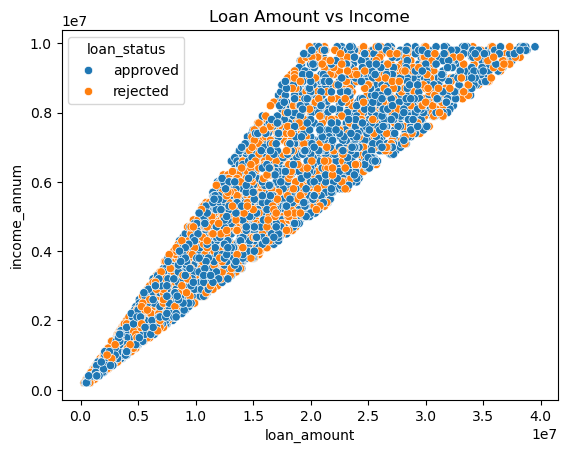

In [49]:
sns.scatterplot(x=df['loan_amount'], y=df['income_annum'], hue=df['loan_status'])
plt.title("Loan Amount vs Income")
plt.show()


Applicants with higher income tend to apply for higher loan amounts.
Loan approval is more common among applicants in higher income ranges, while low-income applicants show a higher rate of rejection. However, the overlap indicates that income alone does not fully decide approval—other variables like CIBIL score, loan term, and asset values also influence loan status.

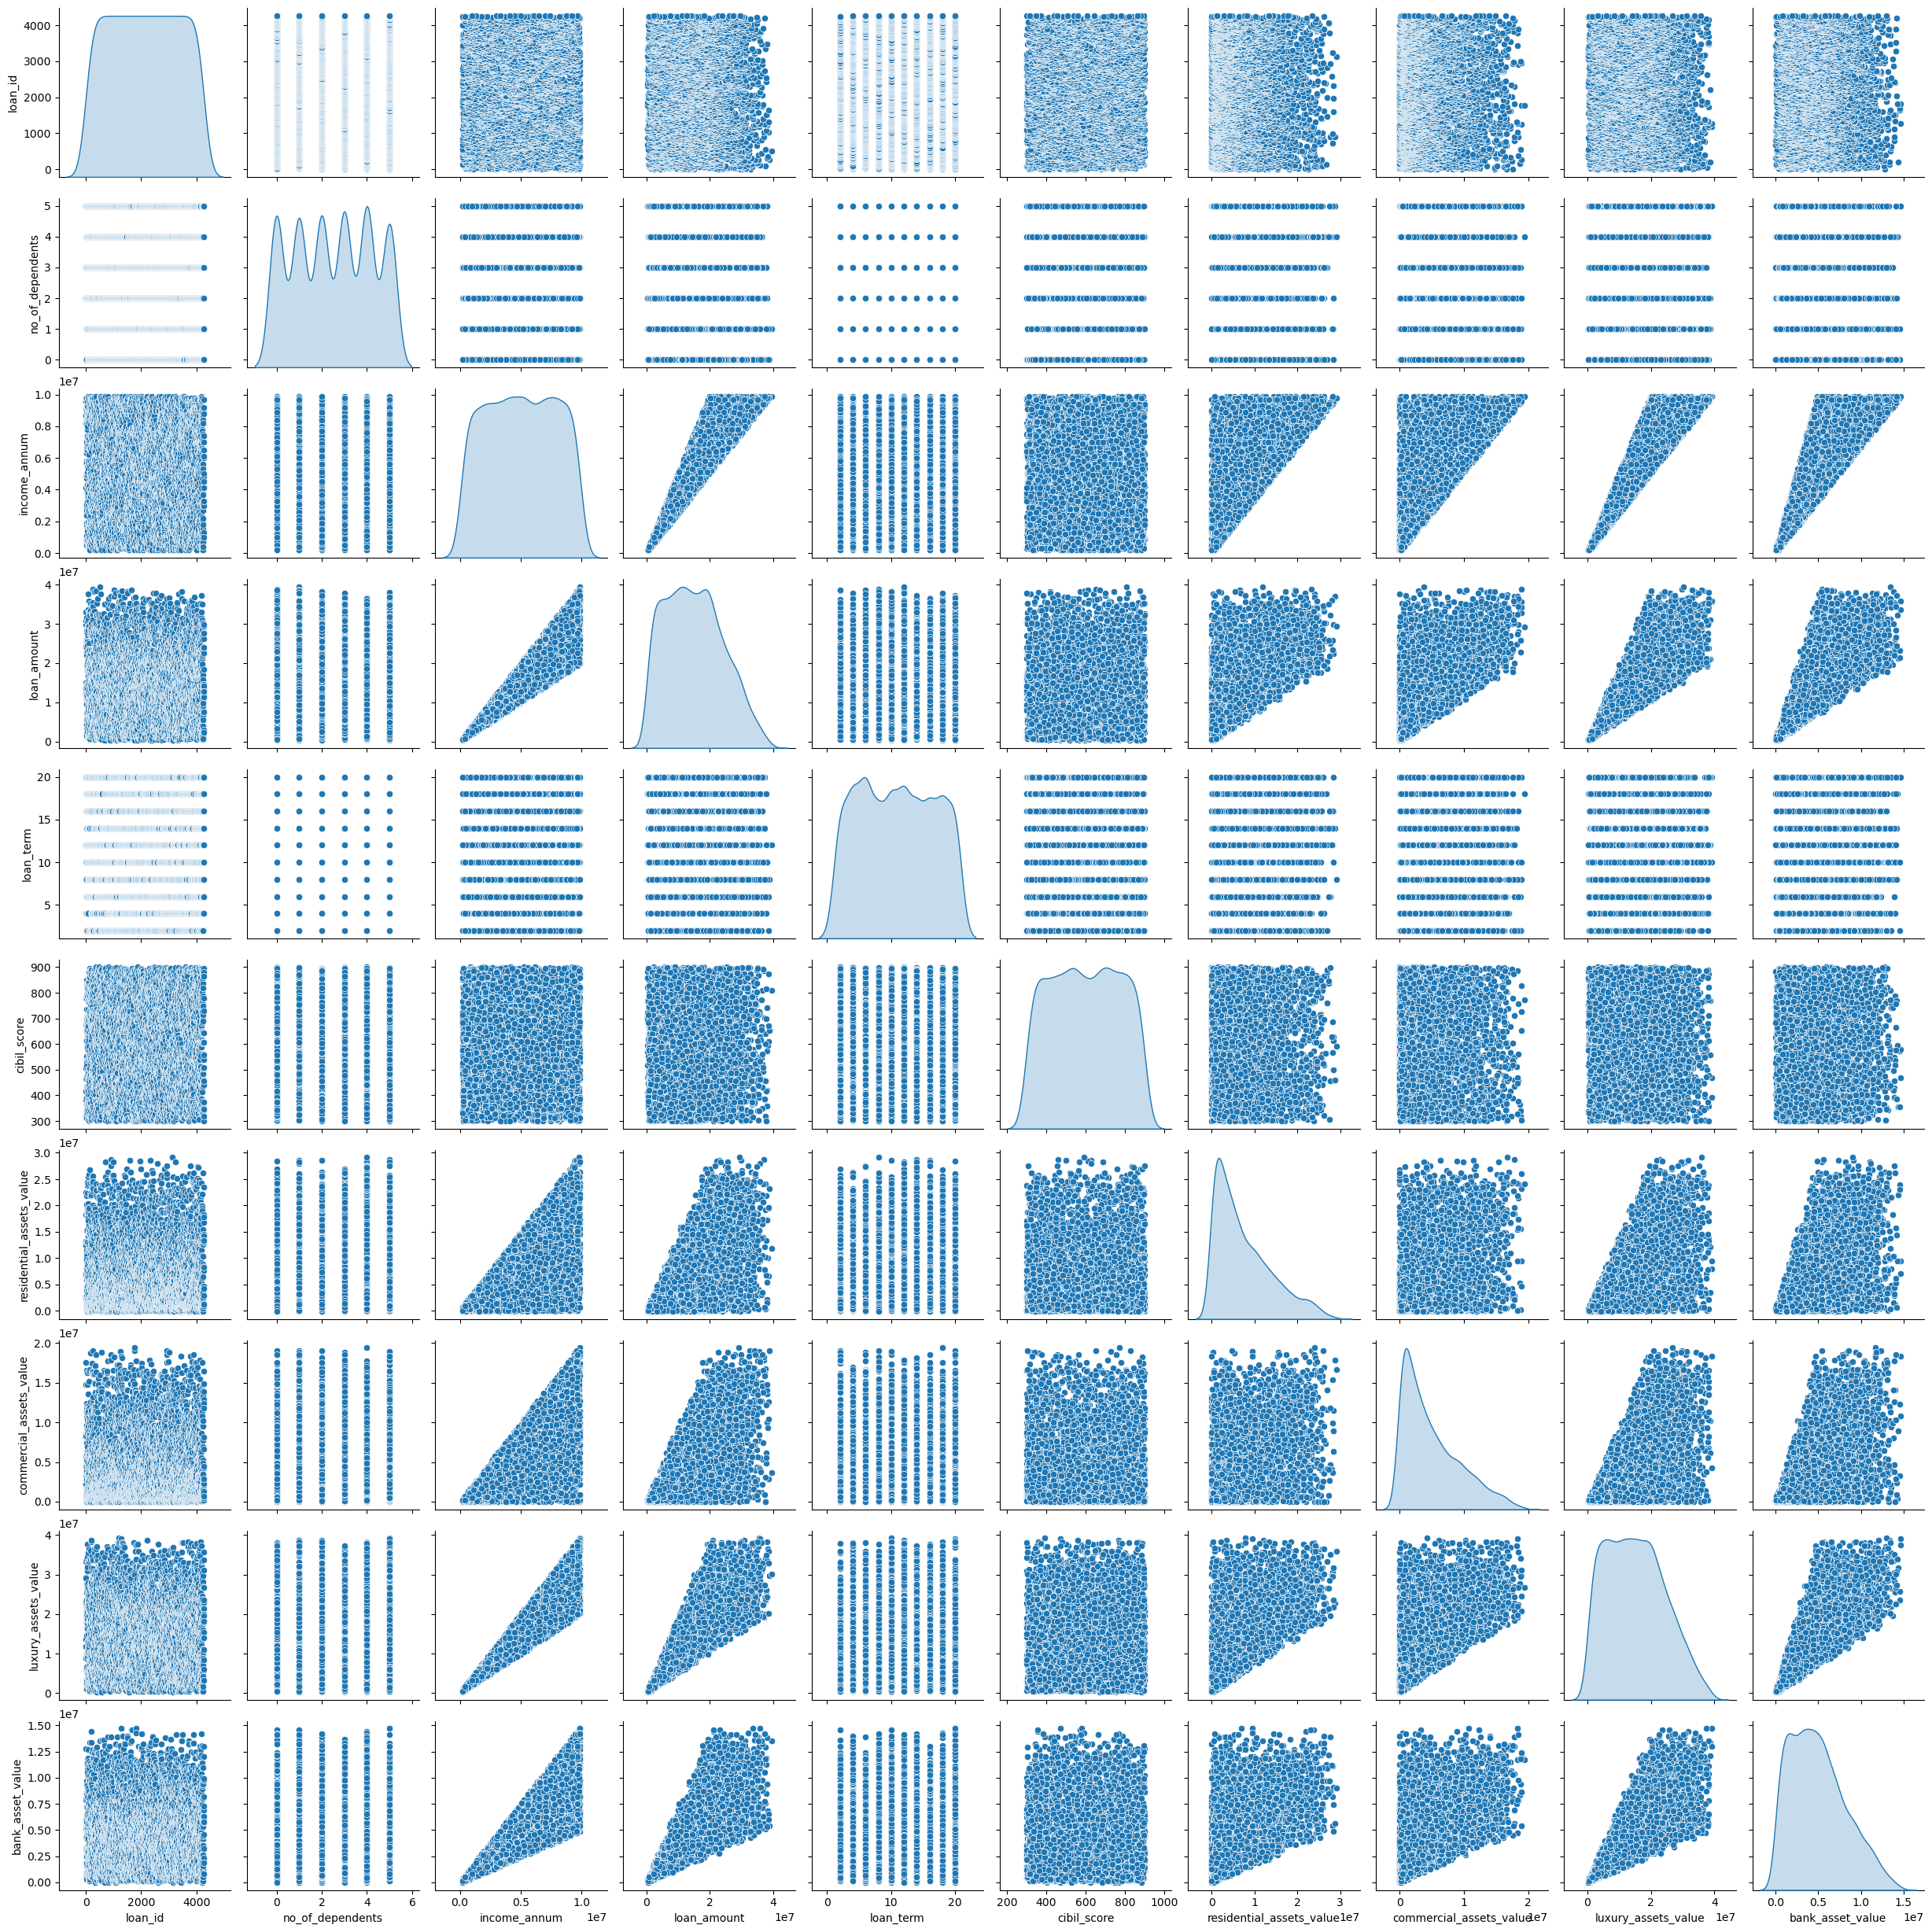

In [50]:
sns.pairplot(df[numeric_cols], diag_kind="kde")
plt.show()


•The pairplot reveals that most financial variables (income, loan amount, and asset values) are right-skewed and positively correlated with each other. Loan amount increases with income, and asset values also rise with income, indicating strong financial patterns.

•CIBIL score follows a near-normal distribution and does not show strong correlation with income or assets visually but is important for classification.

•Features like loan_term and no_of_dependents show weak or no relationship with other numeric variables.


<Axes: xlabel='self_employed', ylabel='education'>

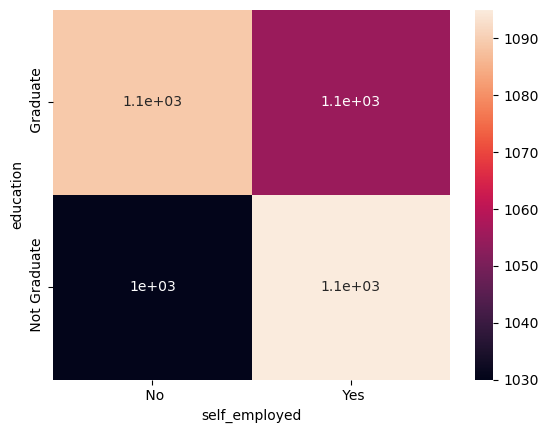

In [57]:
sns.heatmap(pd.crosstab(df['education'], df['self_employed']), annot=True)

The heatmap indicates that the distribution of self-employed and non-self-employed applicants remains quite similar between graduates and non-graduates. This suggests that educational qualification does not have a substantial influence on self-employment status in this dataset. Both categories appear fairly balanced, showing no significant relationship between education level and self-employment.

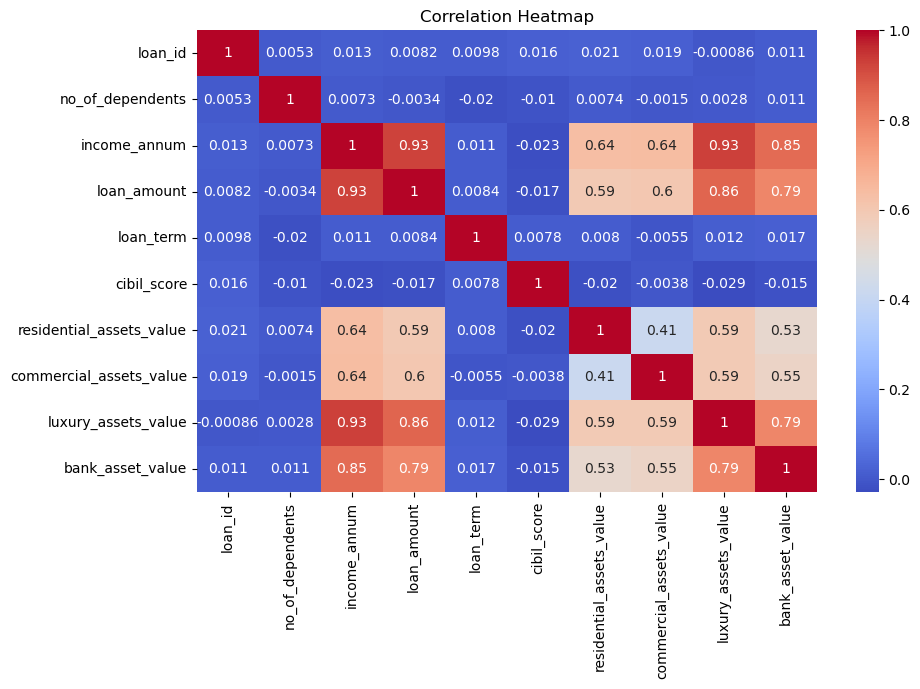

In [51]:
plt.figure(figsize=(10,6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [167]:
import pandas as pd

# 1. Select numeric columns
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

# 2. Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# 3. Convert correlation matrix into long format
corr_long = corr_matrix.reset_index().melt(id_vars='index')
corr_long.columns = ['var1', 'var2', 'corr']

# 4. Save to CSV for Tableau
corr_long.to_csv("corr_matrix_long.csv", index=False)

corr_long.head()

var1              var2      corr
0  no_of_dependents  no_of_dependents  1.000000
1      income_annum  no_of_dependents  0.007266
2       loan_amount  no_of_dependents -0.003366
3         loan_term  no_of_dependents -0.020111
4       cibil_score  no_of_dependents -0.009998

• The correlation heatmap reveals moderate to strong positive correlations among various asset-related variables, indicating multicollinearity. Income also shows moderate correlation with asset values and loan amount, reflecting financial consistency.

• Features such as loan_term and no_of_dependents display very weak correlations with other numeric variables, suggesting limited impact on financial outcomes.

• cibil_score remains largely independent, making it an important factor for loan approval modeling.


In [71]:
df['income_annum_log'] = np.log1p(df['income_annum'])


In [73]:
Q1 = df['income_annum_log'].quantile(0.25)
Q3 = df['income_annum_log'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

new_outliers = ((df['income_annum_log'] < lower) | (df['income_annum_log'] > upper)).sum()
print(new_outliers)
    


49


In [74]:
Q1 = df['income_annum_log'].quantile(0.25)
Q3 = df['income_annum_log'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df['income_annum_log'] = df['income_annum_log'].clip(lower, upper)

#### VISUALIZATION AFTER HANDLING OUTLIERS

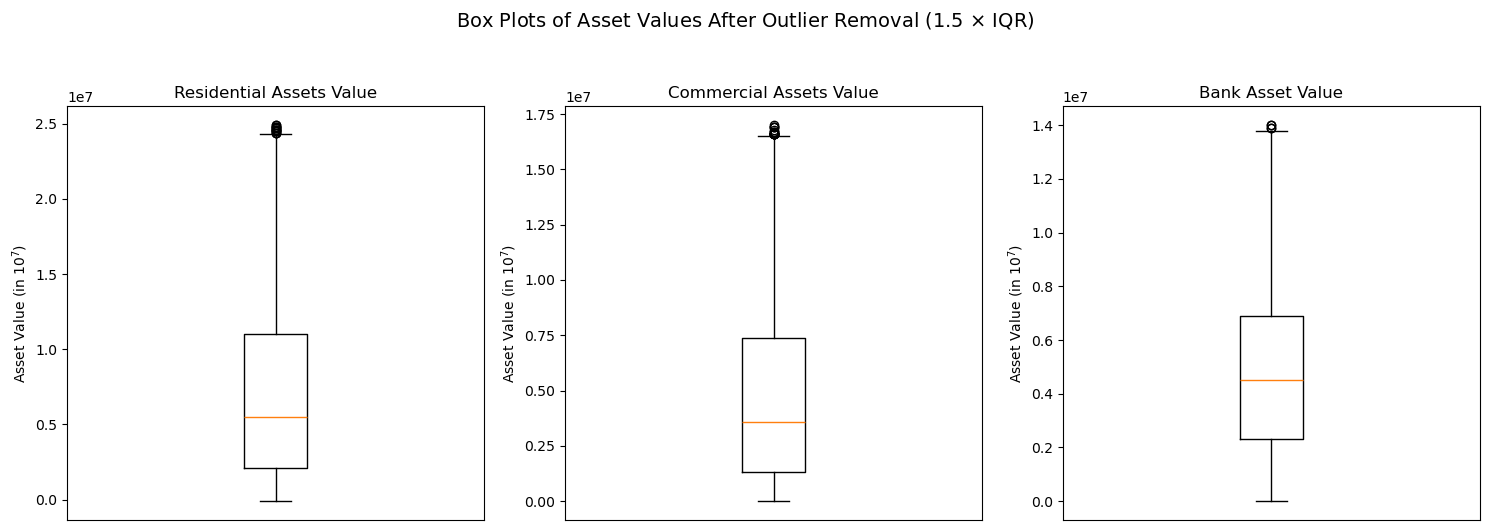

In [128]:
plt.figure(figsize=(15, 5))
plt.suptitle('Box Plots of Asset Values After Outlier Removal (1.5 $\\times$ IQR)', fontsize=14, y=1.05)

for i, col in enumerate(cols_to_clean):
    plt.subplot(1, 3, i + 1)
    
    # Generate the box plot
    plt.boxplot(df_clean[col].dropna())
    
    # Customize plot appearance
    plt.title(col.replace('_', ' ').title(), fontsize=12)
    plt.ylabel('Asset Value (in $10^7$)', fontsize=10)
    plt.xticks([]) # Remove x-ticks

plt.tight_layout()
plt.savefig('cleaned_assets_boxplots.png')

In [163]:

# Remove leading/trailing spaces and make consistent capitalization
df['education'] = df['education'].str.strip().str.title()
df['self_employed'] = df['self_employed'].str.strip().str.title()
df['loan_status'] = df['loan_status'].str.strip().str.title()
df.to_csv(r'C:\Users\ACER\Downloads\loan_approval_dataset.csv', index=False)

print("Cleaned dataset saved as loan_cleaned.csv")


Cleaned dataset saved as loan_cleaned.xlsx


In [162]:
df.head(5)

no_of_dependents     education self_employed  income_annum  loan_amount  \
0                 2      Graduate            No       9600000     29900000   
1                 0  Not Graduate           Yes       4100000     12200000   
2                 3      Graduate            No       9100000     29700000   
3                 3      Graduate            No       8200000     30700000   
4                 5  Not Graduate           Yes       9800000     24200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   
3          8          467                  18200000                  3300000   
4         20          382                  12400000                  8200000   

   luxury_assets_value  bank_asset_value loan_status  income_annum_log  
0             22700000           8000000    Approved         16.077274  
1              8800000           3300000    Rejected         15.226498  
2             33300000          12800000    Rejected         16.023785  
3             23300000           7900000    Rejected         15.919645  
4             29400000           5000000    Rejected         16.097893

#### ENCODING

In [76]:
# Drop loan_id
df = df.drop("loan_id", axis=1)

# Remove leading/trailing spaces and make consistent capitalization
df['education'] = df['education'].str.strip().str.title()
df['self_employed'] = df['self_employed'].str.strip().str.title()
df['loan_status'] = df['loan_status'].str.strip().str.title()

# label encoding
df['education'] = df['education'].map({'Graduate': 1, 'Not Graduate': 0})
df['self_employed'] = df['self_employed'].map({'Yes': 1, 'No': 0})
df['loan_status'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})

# Check sample
print("Sample of encoded data:")
df.head()

Sample of encoded data:


no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                 2          1              0       9600000     29900000   
1                 0          0              1       4100000     12200000   
2                 3          1              0       9100000     29700000   
3                 3          1              0       8200000     30700000   
4                 5          0              1       9800000     24200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   
3          8          467                  18200000                  3300000   
4         20          382                  12400000                  8200000   

   luxury_assets_value  bank_asset_value  loan_status  income_annum_log  
0             22700000           8000000            1         16.077274  
1              8800000           3300000            0         15.226498  
2             33300000          12800000            0         16.023785  
3             23300000           7900000            0         15.919645  
4             29400000           5000000            0         16.097893

In [77]:
# Show how many approved and rejected loans
loan_counts = df['loan_status'].value_counts()
print("\nLoan Status Counts (0 = Rejected, 1 = Approved):")
print(loan_counts)


Loan Status Counts (0 = Rejected, 1 = Approved):
loan_status
1    2541
0    1554
Name: count, dtype: int64


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier

#### Feature Scaling

In [81]:
# Features and target
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

### MODEL TRAINING 

#### 1. LOGISTIC REGRESSION

True Negatives  (TN): 269
False Positives (FP): 42
False Negatives (FN): 32
True Positives  (TP): 476
----------------------------------------
Logistic Regression Accuracy : 0.9096
Logistic Regression Log Loss  : 0.2293
Precision                     : 0.9189
Recall                        : 0.9370
F1-Score                      : 0.9279


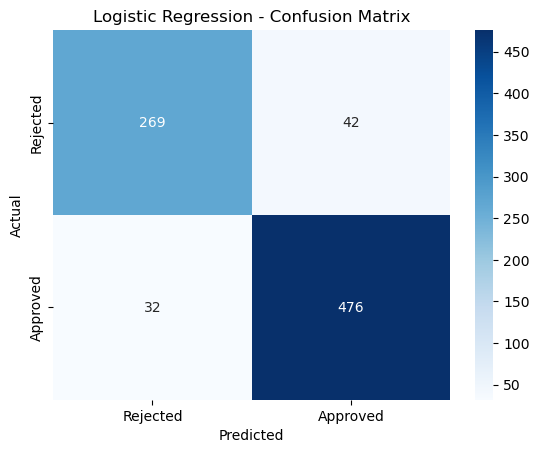

In [83]:
# Model training
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
tn, fp, fn, tp = cm_lr.ravel()

# Print confusion matrix values
print(f"True Negatives  (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives  (TP): {tp}")
print("-" * 40)
# 🔢 Metric formulas
acc_lr = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
loss_lr = log_loss(y_test, y_proba_lr)

# Print results
print(f"Logistic Regression Accuracy : {acc_lr:.4f}")
print(f"Logistic Regression Log Loss  : {loss_lr:.4f}")
print(f"Precision                     : {precision:.4f}")
print(f"Recall                        : {recall:.4f}")
print(f"F1-Score                      : {f1:.4f}")

# Confusion Matrix Heatmap
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Rejected", "Approved"],
            yticklabels=["Rejected", "Approved"])
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### SVM

True Negatives  (TN): 282
False Positives (FP): 29
False Negatives (FN): 29
True Positives  (TP): 479
----------------------------------------
SVM Accuracy : 0.9292
SVM Log Loss  : 0.1745
Precision     : 0.9429
Recall        : 0.9429
F1-Score      : 0.9429


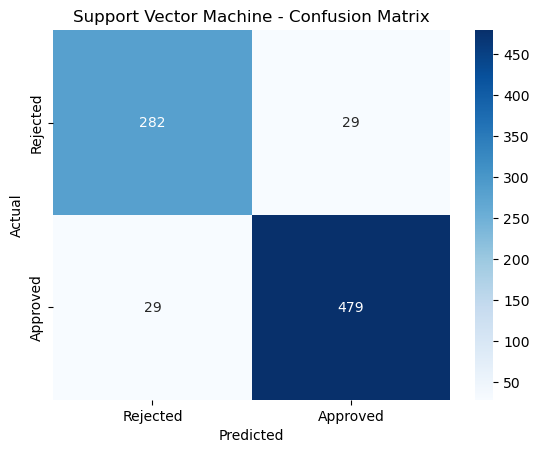

In [84]:
# Support Vector Machine (SVM)
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)
y_proba_svm = svm_model.predict_proba(X_test)[:, 1]

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
tn, fp, fn, tp = cm_svm.ravel()

# Print confusion matrix values
print(f"True Negatives  (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives  (TP): {tp}")
print("-" * 40)
# 🔢 Metric formulas
acc_svm = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
loss_svm = log_loss(y_test, y_proba_svm)

# Print results
print(f"SVM Accuracy : {acc_svm:.4f}")
print(f"SVM Log Loss  : {loss_svm:.4f}")
print(f"Precision     : {precision:.4f}")
print(f"Recall        : {recall:.4f}")
print(f"F1-Score      : {f1:.4f}")

# Confusion Matrix Heatmap
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Rejected", "Approved"],
            yticklabels=["Rejected", "Approved"])
plt.title("Support Vector Machine - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

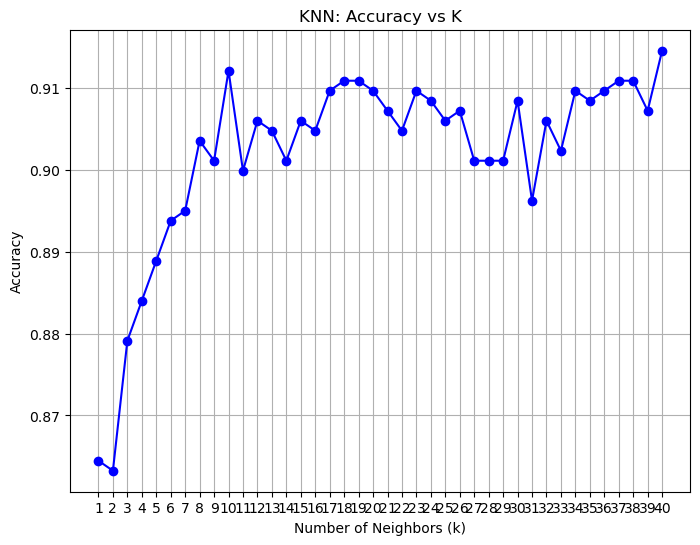

Best k: 40 with accurracy: 0.9145


In [85]:
# Range of k values to test
k_values = range(1, 41)  # 1 to 40 neighbors
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot accuracy vs k
plt.figure(figsize=(8,6))
plt.plot(k_values, accuracies, marker='o', color='blue')
plt.xticks(k_values)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN: Accuracy vs K")
plt.grid(True)
plt.show()

# Print the best k
best_k = k_values[np.argmax(accuracies)]
print(f"Best k: {best_k} with accurracy: {max(accuracies):.4f}")

True Negatives  (TN): 271
False Positives (FP): 40
False Negatives (FN): 34
True Positives  (TP): 474
----------------------------------------
KNN Accuracy : 0.9096
KNN Log Loss  : 0.3065
Precision     : 0.9222
Recall        : 0.9331
F1-Score      : 0.9276


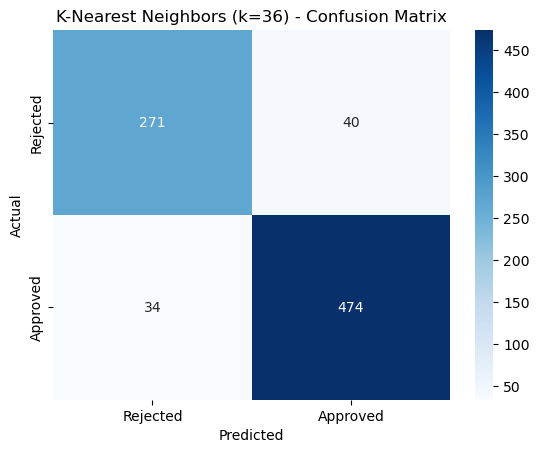

In [86]:
# K-Nearest Neighbors (k = 36)
knn_model = KNeighborsClassifier(n_neighbors=36)
knn_model.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test)
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]

# Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
tn, fp, fn, tp = cm_knn.ravel()

# Print confusion matrix values
print(f"True Negatives  (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives  (TP): {tp}")
print("-" * 40)

# 🔢 Metric formulas
acc_knn = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
loss_knn = log_loss(y_test, y_proba_knn)# Print results
print(f"KNN Accuracy : {acc_knn:.4f}")
print(f"KNN Log Loss  : {loss_knn:.4f}")
print(f"Precision     : {precision:.4f}")
print(f"Recall        : {recall:.4f}")
print(f"F1-Score      : {f1:.4f}")

# Confusion Matrix Heatmap
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Rejected", "Approved"],
            yticklabels=["Rejected", "Approved"])
plt.title("K-Nearest Neighbors (k=36) - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

True Negatives  (TN): 305
False Positives (FP): 6
False Negatives (FN): 10
True Positives  (TP): 498
----------------------------------------
Decision Tree Accuracy : 0.9805
Decision Tree Log Loss  : 0.7041
Precision               : 0.9881
Recall                  : 0.9803
F1-Score                : 0.9842


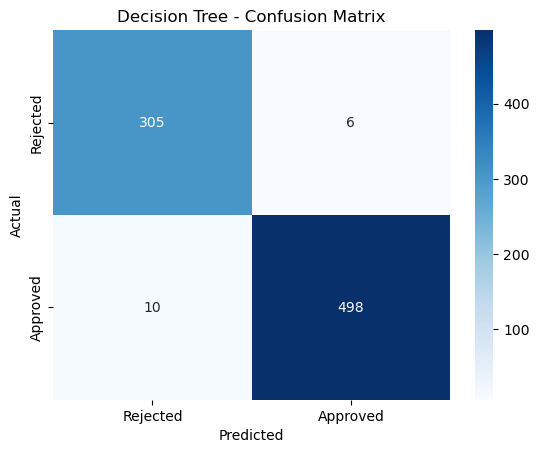

In [87]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
tn, fp, fn, tp = cm_dt.ravel()

# Print confusion matrix values
print(f"True Negatives  (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives  (TP): {tp}")
print("-" * 40)

# 🔢 Metric formulas
acc_dt = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
loss_dt = log_loss(y_test, y_proba_dt)

# Print results
print(f"Decision Tree Accuracy : {acc_dt:.4f}")
print(f"Decision Tree Log Loss  : {loss_dt:.4f}")
print(f"Precision               : {precision:.4f}")
print(f"Recall                  : {recall:.4f}")
print(f"F1-Score                : {f1:.4f}")

# Confusion Matrix Heatmap
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Rejected", "Approved"],
            yticklabels=["Rejected", "Approved"])
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


True Negatives  (TN): 302
False Positives (FP): 9
False Negatives (FN): 5
True Positives  (TP): 503
----------------------------------------
Random Forest Accuracy : 0.9829
Random Forest Log Loss  : 0.0727
Precision               : 0.9824
Recall                  : 0.9902
F1-Score                : 0.9863


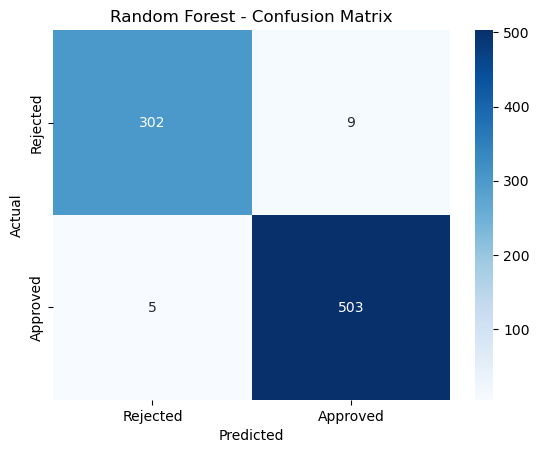

In [88]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
tn, fp, fn, tp = cm_rf.ravel()

# Print confusion matrix values
print(f"True Negatives  (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives  (TP): {tp}")
print("-" * 40)

# 🔢 Metric formulas
acc_rf = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
loss_rf = log_loss(y_test, y_proba_rf)# Print results
print(f"Random Forest Accuracy : {acc_rf:.4f}")
print(f"Random Forest Log Loss  : {loss_rf:.4f}")
print(f"Precision               : {precision:.4f}")
print(f"Recall                  : {recall:.4f}")
print(f"F1-Score                : {f1:.4f}")

# Confusion Matrix Heatmap
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Rejected", "Approved"],
            yticklabels=["Rejected", "Approved"])
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


True Negatives  (TN): 294
False Positives (FP): 17
False Negatives (FN): 19
True Positives  (TP): 489
----------------------------------------
AdaBoost Accuracy : 0.9560
AdaBoost Log Loss  : 0.4186
Precision           : 0.9664
Recall              : 0.9626
F1-Score            : 0.9645


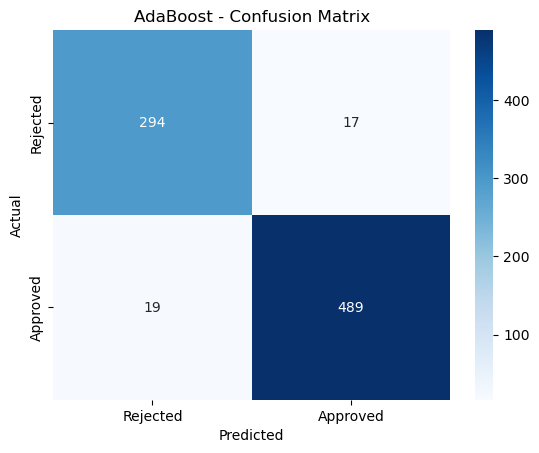

In [89]:
# AdaBoost
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)

# Predictions
y_pred_ada = ada_model.predict(X_test)
y_proba_ada = ada_model.predict_proba(X_test)[:, 1]

# Confusion matrix
cm_ada = confusion_matrix(y_test, y_pred_ada)
tn, fp, fn, tp = cm_ada.ravel()

# Print confusion matrix values
print(f"True Negatives  (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives  (TP): {tp}")
print("-" * 40)

# 🔢 Metric formulas
acc_ada = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
loss_ada = log_loss(y_test, y_proba_ada)

# Print results
print(f"AdaBoost Accuracy : {acc_ada:.4f}")
print(f"AdaBoost Log Loss  : {loss_ada:.4f}")
print(f"Precision           : {precision:.4f}")
print(f"Recall              : {recall:.4f}")
print(f"F1-Score            : {f1:.4f}")

# Confusion Matrix Heatmap
sns.heatmap(cm_ada, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Rejected", "Approved"],
            yticklabels=["Rejected", "Approved"])
plt.title("AdaBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


True Negatives  (TN): 301
False Positives (FP): 10
False Negatives (FN): 7
True Positives  (TP): 501
----------------------------------------
Gradient Boosting Accuracy : 0.9792
Gradient Boosting Log Loss  : 0.0480
Precision                   : 0.9804
Recall                      : 0.9862
F1-Score                    : 0.9833


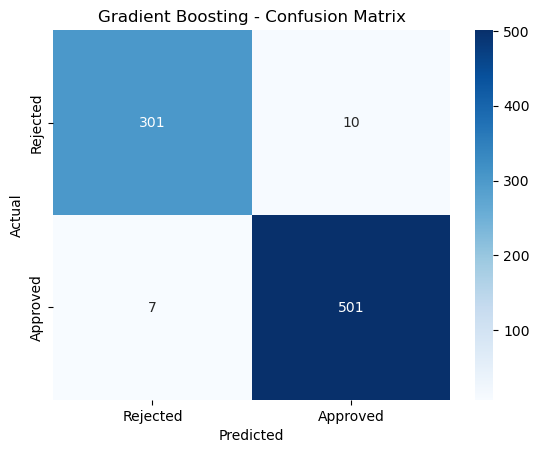

In [92]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)
y_proba_gb = gb_model.predict_proba(X_test)[:, 1]

# Confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
tn, fp, fn, tp = cm_gb.ravel()

# Print confusion matrix values
print(f"True Negatives  (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives  (TP): {tp}")
print("-" * 40)

# 🔢 Metric formulas
acc_gb = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
loss_gb = log_loss(y_test, y_proba_gb)# Print results
print(f"Gradient Boosting Accuracy : {acc_gb:.4f}")
print(f"Gradient Boosting Log Loss  : {loss_gb:.4f}")
print(f"Precision                   : {precision:.4f}")
print(f"Recall                      : {recall:.4f}")
print(f"F1-Score                    : {f1:.4f}")

# Confusion Matrix Heatmap
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Rejected", "Approved"],
            yticklabels=["Rejected", "Approved"])
plt.title("Gradient Boosting - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

✅ Model Comparison (Accuracy & Log Loss):


accuracy  log_loss
Random Forest           0.982906  0.072680
Decision Tree           0.980464  0.704150
Gradient Boosting       0.979243  0.047955
AdaBoost                0.956044  0.418565
Support Vector Machine  0.929182  0.174528
K-Nearest Neighbors     0.909646  0.306482
Logistic Regression     0.909646  0.229330

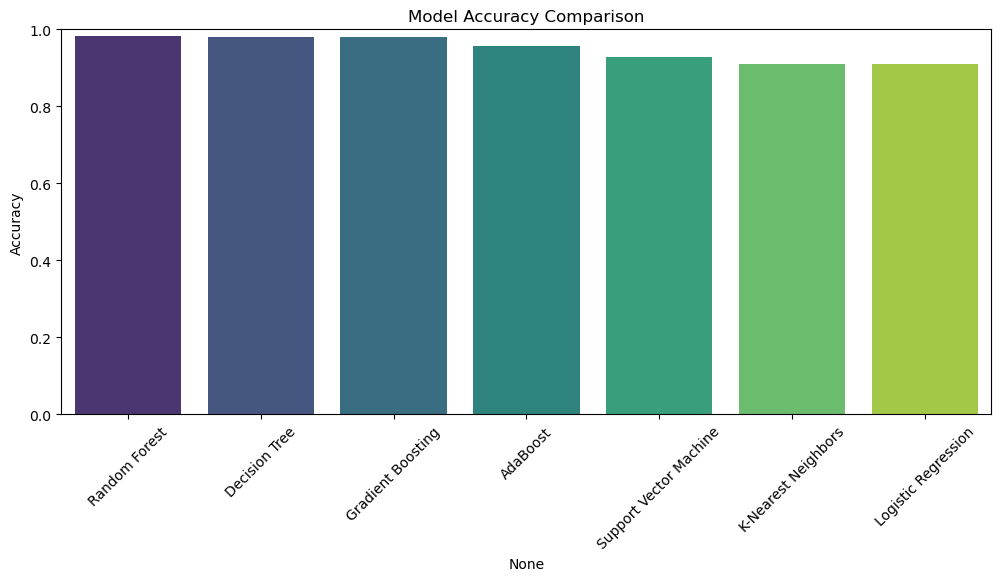

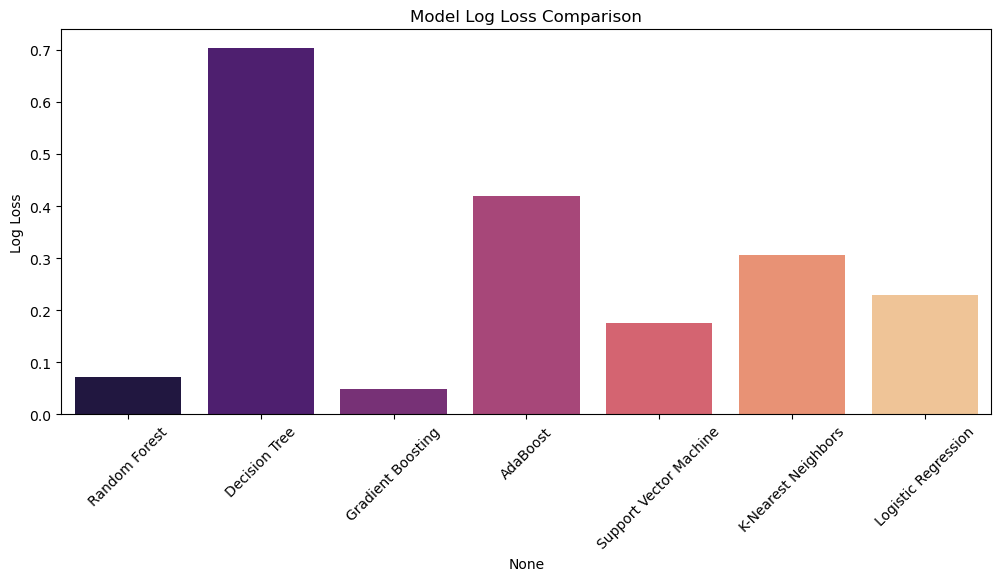

In [93]:
# Combine all results
all_results = {
    "Logistic Regression": {"accuracy": acc_lr, "log_loss": loss_lr},
    "Support Vector Machine": {"accuracy": acc_svm, "log_loss": loss_svm},
    "K-Nearest Neighbors": {"accuracy": acc_knn, "log_loss": loss_knn},
    "Decision Tree": {"accuracy": acc_dt, "log_loss": loss_dt},
    "Random Forest": {"accuracy": acc_rf, "log_loss": loss_rf},
    "AdaBoost": {"accuracy": acc_ada, "log_loss": loss_ada},
    "Gradient Boosting": {"accuracy": acc_gb, "log_loss": loss_gb},    
}

comparison_df = pd.DataFrame(all_results).T
comparison_df = comparison_df.sort_values(by="accuracy", ascending=False)

print("✅ Model Comparison (Accuracy & Log Loss):")
display(comparison_df)

# Visual comparison: Accuracy
plt.figure(figsize=(12,5))
sns.barplot(x=comparison_df.index, y=comparison_df["accuracy"], palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
plt.show()

# Visual comparison: Log Loss
plt.figure(figsize=(12,5))
sns.barplot(x=comparison_df.index, y=comparison_df["log_loss"], palette="magma")
plt.xticks(rotation=45)
plt.ylabel("Log Loss")
plt.title("Model Log Loss Comparison")
plt.show()


In [98]:
approved_samples = [
    {
        "no_of_dependents": 1,
        "education": 1,        # Graduate
        "self_employed": 0,    # No
        "income_annum": 12000000,
        "loan_amount": 20000000,
        "loan_term": 15,
        "cibil_score": 780,
        "residential_assets_value": 7000000,
        "commercial_assets_value": 2000000,
        "luxury_assets_value": 5000000,
        "bank_asset_value": 6000000
    },
    {
        "no_of_dependents": 0,
        "education": 1,        # Graduate
        "self_employed": 1,    # Yes
        "income_annum": 15000000,
        "loan_amount": 25000000,
        "loan_term": 20,
        "cibil_score": 800,
        "residential_assets_value": 8000000,
        "commercial_assets_value": 3000000,
        "luxury_assets_value": 7000000,
        "bank_asset_value": 9000000
    }
]

rejected_samples = [
    {
        "no_of_dependents": 3,
        "education": 0,        # Not Graduate
        "self_employed": 0,    # No
        "income_annum": 4000000,
        "loan_amount": 15000000,
        "loan_term": 12,
        "cibil_score": 400,
        "residential_assets_value": 1000000,
        "commercial_assets_value": 0,
        "luxury_assets_value": 0,
        "bank_asset_value": 2000000
    },
    {
        "no_of_dependents": 2,
        "education": 0,        # Not Graduate
        "self_employed": 1,    # Yes
        "income_annum": 3500000,
        "loan_amount": 18000000,
        "loan_term": 10,
        "cibil_score": 420,
        "residential_assets_value": 2000000,
        "commercial_assets_value": 500000,
        "luxury_assets_value": 0,
        "bank_asset_value": 1500000
    }
]



In [102]:
import numpy as np

# 1. Recreate the missing feature in the sample DataFrames
#    (You must ensure this step matches your original preprocessing)
approved_df['income_annum_log'] = np.log(approved_df['income_annum'])
rejected_df['income_annum_log'] = np.log(rejected_df['income_annum'])

# 2. Ensure the column order matches the original feature matrix X
#    (You need the original column order from your X DataFrame)
#    Assuming X had columns: ['education', 'self_employed', 'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'cash_assets_value', 'income_annum_log']

# Get the original feature names from the fitted scaler
# This is the safest way to ensure the order is correct!
original_features = scaler.feature_names_in_ 

approved_df = approved_df[original_features]
rejected_df = rejected_df[original_features]


# 3. Now, transform the data
# This should now work as the features match the 'fit' data
approved_scaled = scaler.transform(approved_df)
rejected_scaled = scaler.transform(rejected_df)

# Continue with prediction...
# Predict with Random Forest and show probability
print("✅ Approved Samples Predictions:")
for i, row in enumerate(approved_scaled):
    pred = rf_model.predict([row])[0]
    prob = rf_model.predict_proba([row])[0][1]  # probability of approval
    print(f"Sample {i+1}: {'Approved' if pred==1 else 'Rejected'} (Probability: {prob:.2f})")

print("\n❌ Rejected Samples Predictions:")
for i, row in enumerate(rejected_scaled):
    pred = rf_model.predict([row])[0]
    prob = rf_model.predict_proba([row])[0][1]  # probability of approval
    print(f"Sample {i+1}: {'Approved' if pred==1 else 'Rejected'} (Probability: {prob:.2f})")


✅ Approved Samples Predictions:
Sample 1: Approved (Probability: 0.91)
Sample 2: Approved (Probability: 0.95)

❌ Rejected Samples Predictions:
Sample 1: Rejected (Probability: 0.04)
Sample 2: Rejected (Probability: 0.09)


In [104]:
import numpy as np

# 1. Recreate the missing feature in the sample DataFrames
#    (You must ensure this step matches your original preprocessing)
approved_df['income_annum_log'] = np.log(approved_df['income_annum'])
rejected_df['income_annum_log'] = np.log(rejected_df['income_annum'])

# 2. Ensure the column order matches the original feature matrix X
#    (You need the original column order from your X DataFrame)
#    Assuming X had columns: ['education', 'self_employed', 'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'cash_assets_value', 'income_annum_log']

# Get the original feature names from the fitted scaler
# This is the safest way to ensure the order is correct!
original_features = scaler.feature_names_in_ 

approved_df = approved_df[original_features]
rejected_df = rejected_df[original_features]


# 3. Now, transform the data
# This should now work as the features match the 'fit' data
approved_scaled = scaler.transform(approved_df)
rejected_scaled = scaler.transform(rejected_df)

# Predict with Random Forest and show probability
print("✅ Approved Samples Predictions:")
for i, row in enumerate(approved_scaled):
    pred = gb_model.predict([row])[0]
    prob = gb_model.predict_proba([row])[0][1]  # probability of approval
    print(f"Sample {i+1}: {'Approved' if pred==1 else 'Rejected'} (Probability: {prob:.2f})")

print("\n❌ Rejected Samples Predictions:")
for i, row in enumerate(rejected_scaled):
    pred = gb_model.predict([row])[0]
    prob = gb_model.predict_proba([row])[0][1]  # probability of approval
    print(f"Sample {i+1}: {'Approved' if pred==1 else 'Rejected'} (Probability: {prob:.2f})")


✅ Approved Samples Predictions:
Sample 1: Approved (Probability: 1.00)
Sample 2: Approved (Probability: 1.00)

❌ Rejected Samples Predictions:
Sample 1: Rejected (Probability: 0.00)
Sample 2: Rejected (Probability: 0.00)
